/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading non-defended dataset for closed-world scenario
Dataset directory: /kaggle/input/dataset-non-defended-close-world/
X_train loaded
y_train loaded
X_valid loaded
y_valid loaded
X_test loaded
y_test loaded
Data dimensions:
X: Training data's shape :  (76000, 5000)
y: Training data's shape :  (76000,)
X: Validation data's shape :  (9500, 5000)
y: Validation data's shape :  (9500,)
X: Testing data's shape :  (9500, 5000)
y: Testing data's shape :  (9500,)
Merged data dimensions:
X: Merged data's shape :  (95000, 5000)
y: Merged data's shape :  (95000,)
Features of the merged dataset:
[[ 1. -1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  0.  0.  0.]
 [ 1. -1. -1. ...  0.  0.  0.]
 ...
 [-1. -1. -1. ...  0.  0.  0.]
 [-1. -1. -1. ...  0.  0.  0.]
 [ 1. -1.  1. ...  0.  0.  0.]]
Class distribution:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 1000 samples
Class 5: 1000 samples
Class 6: 1000 samples
Class 7: 1000 samples
Class 8: 1000 sampl

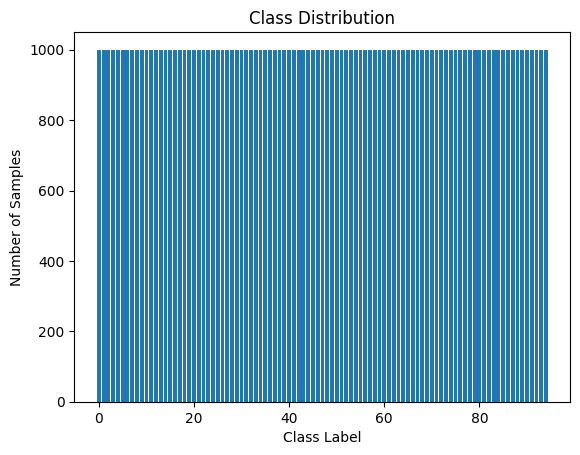

In [1]:
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models

# ... (your existing code)
def LoadDataNoDefCW():

    print("Loading non-defended dataset for closed-world scenario")

    # Point to the directory storing data
    dataset_dir = '/kaggle/input/dataset-non-defended-close-world/'

    # Debug: Print dataset directory
    print("Dataset directory:", dataset_dir)

    try:
        # Load training data
        with open(dataset_dir + 'X_train_NoDef.pkl', 'rb') as handle:
            X_train = np.array(pickle.load(handle, encoding='latin1'))
        print("X_train loaded")

        with open(dataset_dir + 'y_train_NoDef.pkl', 'rb') as handle:
            y_train = np.array(pickle.load(handle, encoding='latin1'))
        print("y_train loaded")

        # Load validation data
        with open(dataset_dir + 'X_valid_NoDef.pkl', 'rb') as handle:
            X_valid = np.array(pickle.load(handle, encoding='latin1'))
        print("X_valid loaded")

        with open(dataset_dir + 'y_valid_NoDef.pkl', 'rb') as handle:
            y_valid = np.array(pickle.load(handle, encoding='latin1'))
        print("y_valid loaded")

        # Load testing data
        with open(dataset_dir + 'X_test_NoDef.pkl', 'rb') as handle:
            X_test = np.array(pickle.load(handle, encoding='latin1'))
        print("X_test loaded")

        with open(dataset_dir + 'y_test_NoDef.pkl', 'rb') as handle:
            y_test = np.array(pickle.load(handle, encoding='latin1'))
        print("y_test loaded")

        print("Data dimensions:")
        print("X: Training data's shape : ", X_train.shape)
        print("y: Training data's shape : ", y_train.shape)
        print("X: Validation data's shape : ", X_valid.shape)
        print("y: Validation data's shape : ", y_valid.shape)
        print("X: Testing data's shape : ", X_test.shape)
        print("y: Testing data's shape : ", y_test.shape)

        # Merge datasets
        X_all = np.concatenate((X_train, X_valid, X_test), axis=0)
        y_all = np.concatenate((y_train, y_valid, y_test), axis=0)

        print("Merged data dimensions:")
        print("X: Merged data's shape : ", X_all.shape)
        print("y: Merged data's shape : ", y_all.shape)
        
        # Print features of the merged dataset
        print("Features of the merged dataset:")
        print(X_all)
        
        # Check if the class distribution is balanced
        unique_classes, class_counts = np.unique(y_all, return_counts=True)
        class_distribution = dict(zip(unique_classes, class_counts))

        print("Class distribution:")
        for class_label, count in class_distribution.items():
            print(f"Class {class_label}: {count} samples")

        # Plot the class distribution
        plt.bar(class_distribution.keys(), class_distribution.values())
        plt.xlabel('Class Label')
        plt.ylabel('Number of Samples')
        plt.title('Class Distribution')
        plt.show()
        
        return X_all, y_all

    except Exception as e:
        print("An error occurred:", str(e))
        return None

# Call the function to load and merge data
X_all, y_all = LoadDataNoDefCW()



Model built successfully.
Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv1D)       (None, 5000, 32)          288       
                                                                 
 batch_normalization_1 (Bat  (None, 5000, 32)          128       
 chNormalization)                                                
                                                                 
 block1_adv_act1 (ELU)       (None, 5000, 32)          0         
                                                                 
 block1_conv2 (Conv1D)       (None, 5000, 32)          8224      
                                                                 
 batch_normalization_2 (Bat  (None, 5000, 32)          128       
 chNormalization)                                                
                                                                 
 block1_adv_act

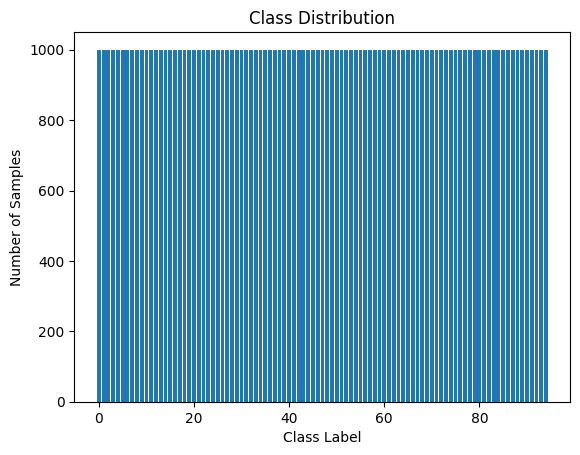


Training on Fold 1/5
Model built successfully.
Epoch 1/10
1188/1188 - 90s - loss: 1.4830 - accuracy: 0.6198 - val_loss: 0.3482 - val_accuracy: 0.9152 - 90s/epoch - 76ms/step
Epoch 2/10
1188/1188 - 80s - loss: 0.5251 - accuracy: 0.8635 - val_loss: 0.2221 - val_accuracy: 0.9452 - 80s/epoch - 67ms/step
Epoch 3/10
1188/1188 - 80s - loss: 0.3790 - accuracy: 0.9010 - val_loss: 0.2006 - val_accuracy: 0.9491 - 80s/epoch - 67ms/step
Epoch 4/10
1188/1188 - 79s - loss: 0.3087 - accuracy: 0.9191 - val_loss: 0.1705 - val_accuracy: 0.9581 - 79s/epoch - 67ms/step
Epoch 5/10
1188/1188 - 80s - loss: 0.2667 - accuracy: 0.9296 - val_loss: 0.1477 - val_accuracy: 0.9636 - 80s/epoch - 68ms/step
Epoch 6/10
1188/1188 - 80s - loss: 0.2283 - accuracy: 0.9393 - val_loss: 0.1352 - val_accuracy: 0.9687 - 80s/epoch - 68ms/step
Epoch 7/10
1188/1188 - 81s - loss: 0.2048 - accuracy: 0.9451 - val_loss: 0.1244 - val_accuracy: 0.9702 - 81s/epoch - 68ms/step
Epoch 8/10
1188/1188 - 81s - loss: 0.1896 - accuracy: 0.9491 - 

In [2]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models
import numpy as np


class DFNet:
    @staticmethod
    def build(input_shape, classes, dropout_rate1=0.7, dropout_rate2=0.5, dropout_rate_fc=0.5):
        model = Sequential()

        # ... (previous model definition remains unchanged)
        # Block 1
        filter_num = [None, 32, 64, 128, 256]
        kernel_size = [None, 8, 8, 8, 8]
        conv_stride_size = [None, 1, 1, 1, 1]
        pool_stride_size = [None, 4, 4, 4, 4]
        pool_size = [None, 8, 8, 8, 8]

        for i in range(1, 4):
            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             input_shape=input_shape if i == 1 else (None, input_shape[1]),
                             name=f'block{i}_conv1'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2 - 1}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act1'))

            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             name=f'block{i}_conv2'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act2'))

            model.add(MaxPooling1D(pool_size=pool_size[i], strides=pool_stride_size[i],
                                   padding='same', name=f'block{i}_pool'))
            model.add(Dropout(0.1, name=f'block{i}_dropout'))

        # ... (rest of the model remains unchanged)


        model.add(Flatten(name='flatten'))



        # Fully connected layers
        for i in range(1, 4):
            model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name=f'fc{i}'))
            model.add(BatchNormalization(name=f'batch_normalization_{i + 8}'))
            model.add(Activation('relu', name=f'fc{i}_act'))

            # Experiment with different dropout rates
            model.add(Dropout(dropout_rate_fc, name=f'fc{i}_dropout'))

        # Output layer
        #model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc3'))
       # model.add(Activation('softmax', name="softmax"))
        # Output layer
        model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc_final'))
        model.add(Activation('softmax', name="softmax"))

        print("Model built successfully.")
        return model

# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 10

# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5

# Build the model with the specified dropout rates
model = DFNet.build(input_shape=input_shape, classes=num_classes,
                    dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)


# Print the model summary
print("Model Summary:")
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 95

# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5

# Load and merge data using the function you defined
X_all, y_all = LoadDataNoDefCW()

# Define the number of folds
n_splits = 5  # You can adjust this as needed

# Initialize Stratified K-Fold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
all_histories = []

# Iterate over folds
for fold, (train_index, test_index) in enumerate(stratkf.split(X_all, y_all)):
    print(f"\nTraining on Fold {fold + 1}/{n_splits}")

    # Split the data
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y_all[train_index], y_all[test_index]

    # Build the model
    model = DFNet.build(input_shape=input_shape, classes=num_classes,
                        dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"\nFold {fold + 1} - Test Accuracy: {accuracy * 100:.2f}%")

    # Save history for later analysis if needed
    all_histories.append(history)
    # Check unique labels in y_train
    
    # Update num_classes based on the actual number of unique classes in your dataset
num_classes = len(np.unique(y_all))


Loading non-defended dataset for closed-world scenario
Dataset directory: /kaggle/input/dataset-non-defended-close-world/
X_train loaded
y_train loaded
X_valid loaded
y_valid loaded
X_test loaded
y_test loaded
Data dimensions:
X: Training data's shape :  (76000, 5000)
y: Training data's shape :  (76000,)
X: Validation data's shape :  (9500, 5000)
y: Validation data's shape :  (9500,)
X: Testing data's shape :  (9500, 5000)
y: Testing data's shape :  (9500,)
Merged data dimensions:
X: Merged data's shape :  (95000, 5000)
y: Merged data's shape :  (95000,)
Features of the merged dataset:
[[ 1. -1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  0.  0.  0.]
 [ 1. -1. -1. ...  0.  0.  0.]
 ...
 [-1. -1. -1. ...  0.  0.  0.]
 [-1. -1. -1. ...  0.  0.  0.]
 [ 1. -1.  1. ...  0.  0.  0.]]
Class distribution:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 1000 samples
Class 5: 1000 samples
Class 6: 1000 samples
Class 7: 1000 samples
Class 8: 1000 sampl

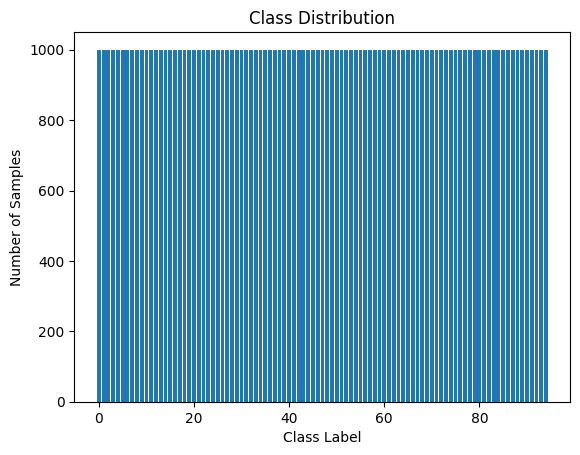

In [3]:
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models

# ... (your existing code)
def LoadDataNoDefCW():

    print("Loading non-defended dataset for closed-world scenario")

    # Point to the directory storing data
    dataset_dir = '/kaggle/input/dataset-non-defended-close-world/'

    # Debug: Print dataset directory
    print("Dataset directory:", dataset_dir)

    try:
        # Load training data
        with open(dataset_dir + 'X_train_NoDef.pkl', 'rb') as handle:
            X_train = np.array(pickle.load(handle, encoding='latin1'))
        print("X_train loaded")

        with open(dataset_dir + 'y_train_NoDef.pkl', 'rb') as handle:
            y_train = np.array(pickle.load(handle, encoding='latin1'))
        print("y_train loaded")

        # Load validation data
        with open(dataset_dir + 'X_valid_NoDef.pkl', 'rb') as handle:
            X_valid = np.array(pickle.load(handle, encoding='latin1'))
        print("X_valid loaded")

        with open(dataset_dir + 'y_valid_NoDef.pkl', 'rb') as handle:
            y_valid = np.array(pickle.load(handle, encoding='latin1'))
        print("y_valid loaded")

        # Load testing data
        with open(dataset_dir + 'X_test_NoDef.pkl', 'rb') as handle:
            X_test = np.array(pickle.load(handle, encoding='latin1'))
        print("X_test loaded")

        with open(dataset_dir + 'y_test_NoDef.pkl', 'rb') as handle:
            y_test = np.array(pickle.load(handle, encoding='latin1'))
        print("y_test loaded")

        print("Data dimensions:")
        print("X: Training data's shape : ", X_train.shape)
        print("y: Training data's shape : ", y_train.shape)
        print("X: Validation data's shape : ", X_valid.shape)
        print("y: Validation data's shape : ", y_valid.shape)
        print("X: Testing data's shape : ", X_test.shape)
        print("y: Testing data's shape : ", y_test.shape)

        # Merge datasets
        X_all = np.concatenate((X_train, X_valid, X_test), axis=0)
        y_all = np.concatenate((y_train, y_valid, y_test), axis=0)

        print("Merged data dimensions:")
        print("X: Merged data's shape : ", X_all.shape)
        print("y: Merged data's shape : ", y_all.shape)
        
        # Print features of the merged dataset
        print("Features of the merged dataset:")
        print(X_all)
        
        # Check if the class distribution is balanced
        unique_classes, class_counts = np.unique(y_all, return_counts=True)
        class_distribution = dict(zip(unique_classes, class_counts))

        print("Class distribution:")
        for class_label, count in class_distribution.items():
            print(f"Class {class_label}: {count} samples")

        # Plot the class distribution
        plt.bar(class_distribution.keys(), class_distribution.values())
        plt.xlabel('Class Label')
        plt.ylabel('Number of Samples')
        plt.title('Class Distribution')
        plt.show()
        
        return X_all, y_all

    except Exception as e:
        print("An error occurred:", str(e))
        return None

# Call the function to load and merge data
X_all, y_all = LoadDataNoDefCW()



Model built successfully.
Model Summary:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv1D)       (None, 5000, 32)          288       
                                                                 
 batch_normalization_1 (Bat  (None, 5000, 32)          128       
 chNormalization)                                                
                                                                 
 block1_adv_act1 (ELU)       (None, 5000, 32)          0         
                                                                 
 block1_conv2 (Conv1D)       (None, 5000, 32)          8224      
                                                                 
 batch_normalization_2 (Bat  (None, 5000, 32)          128       
 chNormalization)                                                
                                                                 
 block1_adv_a

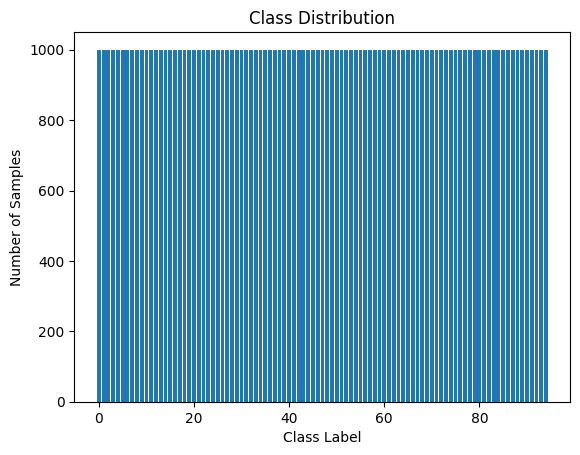


Training on Fold 1/5
Model built successfully.
Epoch 1/20
1188/1188 - 90s - loss: 1.3757 - accuracy: 0.6466 - val_loss: 0.3370 - val_accuracy: 0.9181 - 90s/epoch - 75ms/step
Epoch 2/20
1188/1188 - 80s - loss: 0.4984 - accuracy: 0.8709 - val_loss: 0.2487 - val_accuracy: 0.9413 - 80s/epoch - 68ms/step
Epoch 3/20
1188/1188 - 80s - loss: 0.3645 - accuracy: 0.9056 - val_loss: 0.1801 - val_accuracy: 0.9553 - 80s/epoch - 68ms/step
Epoch 4/20
1188/1188 - 81s - loss: 0.3026 - accuracy: 0.9213 - val_loss: 0.1638 - val_accuracy: 0.9599 - 81s/epoch - 68ms/step
Epoch 5/20
1188/1188 - 81s - loss: 0.2566 - accuracy: 0.9330 - val_loss: 0.1489 - val_accuracy: 0.9629 - 81s/epoch - 68ms/step
Epoch 6/20
1188/1188 - 81s - loss: 0.2293 - accuracy: 0.9398 - val_loss: 0.1384 - val_accuracy: 0.9655 - 81s/epoch - 68ms/step
Epoch 7/20
1188/1188 - 80s - loss: 0.2053 - accuracy: 0.9455 - val_loss: 0.1237 - val_accuracy: 0.9696 - 80s/epoch - 68ms/step
Epoch 8/20
1188/1188 - 80s - loss: 0.1889 - accuracy: 0.9499 - 

In [4]:
from keras.callbacks import EarlyStopping

# ... (previous imports and code remain unchanged)
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models
import numpy as np


class DFNet:
    @staticmethod
    def build(input_shape, classes, dropout_rate1=0.7, dropout_rate2=0.5, dropout_rate_fc=0.5):
        model = Sequential()

        # ... (previous model definition remains unchanged)
        # Block 1
        filter_num = [None, 32, 64, 128, 256]
        kernel_size = [None, 8, 8, 8, 8]
        conv_stride_size = [None, 1, 1, 1, 1]
        pool_stride_size = [None, 4, 4, 4, 4]
        pool_size = [None, 8, 8, 8, 8]

        for i in range(1, 4):
            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             input_shape=input_shape if i == 1 else (None, input_shape[1]),
                             name=f'block{i}_conv1'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2 - 1}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act1'))

            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             name=f'block{i}_conv2'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act2'))

            model.add(MaxPooling1D(pool_size=pool_size[i], strides=pool_stride_size[i],
                                   padding='same', name=f'block{i}_pool'))
            model.add(Dropout(0.1, name=f'block{i}_dropout'))

        # ... (rest of the model remains unchanged)


        model.add(Flatten(name='flatten'))



        # Fully connected layers
        for i in range(1, 4):
            model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name=f'fc{i}'))
            model.add(BatchNormalization(name=f'batch_normalization_{i + 8}'))
            model.add(Activation('relu', name=f'fc{i}_act'))

            # Experiment with different dropout rates
            model.add(Dropout(dropout_rate_fc, name=f'fc{i}_dropout'))

        # Output layer
        #model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc3'))
       # model.add(Activation('softmax', name="softmax"))
        # Output layer
        model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc_final'))
        model.add(Activation('softmax', name="softmax"))

        print("Model built successfully.")
        return model

# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 10

# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5

# Build the model with the specified dropout rates
model = DFNet.build(input_shape=input_shape, classes=num_classes,
                    dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)


# Print the model summary
print("Model Summary:")
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 95

# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5

# Load and merge data using the function you defined
X_all, y_all = LoadDataNoDefCW()

# Define the number of folds
n_splits = 5  # You can adjust this as needed

# Initialize Stratified K-Fold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
all_histories = []

# Iterate over folds
for fold, (train_index, test_index) in enumerate(stratkf.split(X_all, y_all)):
    print(f"\nTraining on Fold {fold + 1}/{n_splits}")

    # Split the data
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y_all[train_index], y_all[test_index]

    # Build the model
    model = DFNet.build(input_shape=input_shape, classes=num_classes,
                        dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=20, batch_size=64, 
                        validation_data=(X_test, y_test), verbose=2, callbacks=[early_stopping])

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"\nFold {fold + 1} - Test Accuracy: {accuracy * 100:.2f}%")

    # Save history for later analysis if needed
    all_histories.append(history)


Loading non-defended dataset for closed-world scenario
Dataset directory: /kaggle/input/dataset-non-defended-close-world/
X_train loaded
y_train loaded
X_valid loaded
y_valid loaded
X_test loaded
y_test loaded
Data dimensions:
X: Training data's shape :  (76000, 5000)
y: Training data's shape :  (76000,)
X: Validation data's shape :  (9500, 5000)
y: Validation data's shape :  (9500,)
X: Testing data's shape :  (9500, 5000)
y: Testing data's shape :  (9500,)
Merged data dimensions:
X: Merged data's shape :  (95000, 5000)
y: Merged data's shape :  (95000,)
Features of the merged dataset:
[[ 1. -1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  0.  0.  0.]
 [ 1. -1. -1. ...  0.  0.  0.]
 ...
 [-1. -1. -1. ...  0.  0.  0.]
 [-1. -1. -1. ...  0.  0.  0.]
 [ 1. -1.  1. ...  0.  0.  0.]]
Class distribution:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 1000 samples
Class 5: 1000 samples
Class 6: 1000 samples
Class 7: 1000 samples
Class 8: 1000 sampl

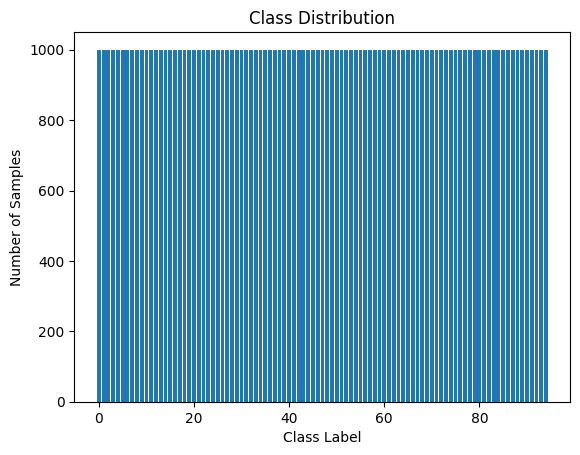

In [5]:
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models

# ... (your existing code)
def LoadDataNoDefCW():

    print("Loading non-defended dataset for closed-world scenario")

    # Point to the directory storing data
    dataset_dir = '/kaggle/input/dataset-non-defended-close-world/'

    # Debug: Print dataset directory
    print("Dataset directory:", dataset_dir)

    try:
        # Load training data
        with open(dataset_dir + 'X_train_NoDef.pkl', 'rb') as handle:
            X_train = np.array(pickle.load(handle, encoding='latin1'))
        print("X_train loaded")

        with open(dataset_dir + 'y_train_NoDef.pkl', 'rb') as handle:
            y_train = np.array(pickle.load(handle, encoding='latin1'))
        print("y_train loaded")

        # Load validation data
        with open(dataset_dir + 'X_valid_NoDef.pkl', 'rb') as handle:
            X_valid = np.array(pickle.load(handle, encoding='latin1'))
        print("X_valid loaded")

        with open(dataset_dir + 'y_valid_NoDef.pkl', 'rb') as handle:
            y_valid = np.array(pickle.load(handle, encoding='latin1'))
        print("y_valid loaded")

        # Load testing data
        with open(dataset_dir + 'X_test_NoDef.pkl', 'rb') as handle:
            X_test = np.array(pickle.load(handle, encoding='latin1'))
        print("X_test loaded")

        with open(dataset_dir + 'y_test_NoDef.pkl', 'rb') as handle:
            y_test = np.array(pickle.load(handle, encoding='latin1'))
        print("y_test loaded")

        print("Data dimensions:")
        print("X: Training data's shape : ", X_train.shape)
        print("y: Training data's shape : ", y_train.shape)
        print("X: Validation data's shape : ", X_valid.shape)
        print("y: Validation data's shape : ", y_valid.shape)
        print("X: Testing data's shape : ", X_test.shape)
        print("y: Testing data's shape : ", y_test.shape)

        # Merge datasets
        X_all = np.concatenate((X_train, X_valid, X_test), axis=0)
        y_all = np.concatenate((y_train, y_valid, y_test), axis=0)

        print("Merged data dimensions:")
        print("X: Merged data's shape : ", X_all.shape)
        print("y: Merged data's shape : ", y_all.shape)
        
        # Print features of the merged dataset
        print("Features of the merged dataset:")
        print(X_all)
        
        # Check if the class distribution is balanced
        unique_classes, class_counts = np.unique(y_all, return_counts=True)
        class_distribution = dict(zip(unique_classes, class_counts))

        print("Class distribution:")
        for class_label, count in class_distribution.items():
            print(f"Class {class_label}: {count} samples")

        # Plot the class distribution
        plt.bar(class_distribution.keys(), class_distribution.values())
        plt.xlabel('Class Label')
        plt.ylabel('Number of Samples')
        plt.title('Class Distribution')
        plt.show()
        
        return X_all, y_all

    except Exception as e:
        print("An error occurred:", str(e))
        return None

# Call the function to load and merge data
X_all, y_all = LoadDataNoDefCW()



Model built successfully.
Model Summary:
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv1D)       (None, 5000, 32)          288       
                                                                 
 batch_normalization_1 (Bat  (None, 5000, 32)          128       
 chNormalization)                                                
                                                                 
 block1_adv_act1 (ELU)       (None, 5000, 32)          0         
                                                                 
 block1_conv2 (Conv1D)       (None, 5000, 32)          8224      
                                                                 
 batch_normalization_2 (Bat  (None, 5000, 32)          128       
 chNormalization)                                                
                                                                 
 block1_adv_

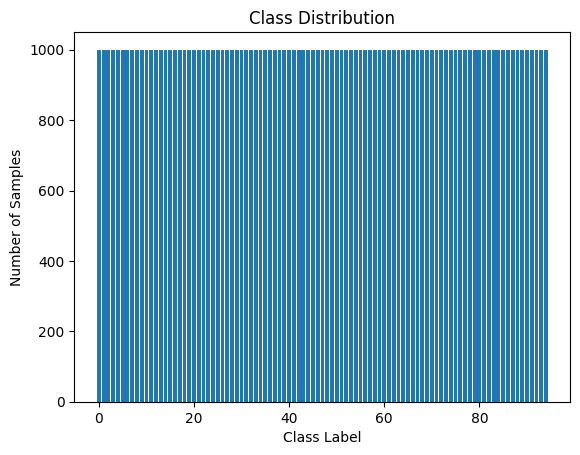


Training on Fold 1/10
Model built successfully.
Epoch 1/20
1336/1336 - 97s - loss: 1.3134 - accuracy: 0.6522 - val_loss: 0.3549 - val_accuracy: 0.9086 - 97s/epoch - 73ms/step
Epoch 2/20
1336/1336 - 87s - loss: 0.5130 - accuracy: 0.8649 - val_loss: 0.2441 - val_accuracy: 0.9352 - 87s/epoch - 65ms/step
Epoch 3/20
1336/1336 - 87s - loss: 0.3827 - accuracy: 0.8997 - val_loss: 0.1885 - val_accuracy: 0.9515 - 87s/epoch - 65ms/step
Epoch 4/20
1336/1336 - 87s - loss: 0.3145 - accuracy: 0.9167 - val_loss: 0.2002 - val_accuracy: 0.9491 - 87s/epoch - 65ms/step
Epoch 5/20
1336/1336 - 87s - loss: 0.2740 - accuracy: 0.9282 - val_loss: 0.1382 - val_accuracy: 0.9646 - 87s/epoch - 65ms/step
Epoch 6/20
1336/1336 - 87s - loss: 0.2393 - accuracy: 0.9368 - val_loss: 0.1161 - val_accuracy: 0.9707 - 87s/epoch - 65ms/step
Epoch 7/20
1336/1336 - 87s - loss: 0.2161 - accuracy: 0.9435 - val_loss: 0.1118 - val_accuracy: 0.9712 - 87s/epoch - 65ms/step
Epoch 8/20
1336/1336 - 87s - loss: 0.1956 - accuracy: 0.9494 -

In [6]:
from keras.callbacks import EarlyStopping

# ... (previous imports and code remain unchanged)
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models
import numpy as np


class DFNet:
    @staticmethod
    def build(input_shape, classes, dropout_rate1=0.7, dropout_rate2=0.5, dropout_rate_fc=0.5):
        model = Sequential()

        # ... (previous model definition remains unchanged)
        # Block 1
        filter_num = [None, 32, 64, 128, 256]
        kernel_size = [None, 8, 8, 8, 8]
        conv_stride_size = [None, 1, 1, 1, 1]
        pool_stride_size = [None, 4, 4, 4, 4]
        pool_size = [None, 8, 8, 8, 8]

        for i in range(1, 4):
            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             input_shape=input_shape if i == 1 else (None, input_shape[1]),
                             name=f'block{i}_conv1'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2 - 1}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act1'))

            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             name=f'block{i}_conv2'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act2'))

            model.add(MaxPooling1D(pool_size=pool_size[i], strides=pool_stride_size[i],
                                   padding='same', name=f'block{i}_pool'))
            model.add(Dropout(0.1, name=f'block{i}_dropout'))

        # ... (rest of the model remains unchanged)


        model.add(Flatten(name='flatten'))



        # Fully connected layers
        for i in range(1, 4):
            model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name=f'fc{i}'))
            model.add(BatchNormalization(name=f'batch_normalization_{i + 8}'))
            model.add(Activation('relu', name=f'fc{i}_act'))

            # Experiment with different dropout rates
            model.add(Dropout(dropout_rate_fc, name=f'fc{i}_dropout'))

        # Output layer
        #model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc3'))
       # model.add(Activation('softmax', name="softmax"))
        # Output layer
        model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc_final'))
        model.add(Activation('softmax', name="softmax"))

        print("Model built successfully.")
        return model

# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 10

# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5

# Build the model with the specified dropout rates
model = DFNet.build(input_shape=input_shape, classes=num_classes,
                    dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)


# Print the model summary
print("Model Summary:")
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 95

# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5

# Load and merge data using the function you defined
X_all, y_all = LoadDataNoDefCW()

# Define the number of folds
n_splits = 10  # You can adjust this as needed

# Initialize Stratified K-Fold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
all_histories = []

# Iterate over folds
for fold, (train_index, test_index) in enumerate(stratkf.split(X_all, y_all)):
    print(f"\nTraining on Fold {fold + 1}/{n_splits}")

    # Split the data
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y_all[train_index], y_all[test_index]

    # Build the model
    model = DFNet.build(input_shape=input_shape, classes=num_classes,
                        dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)

    # Compile the model
    optimizer = Adam(learning_rate=0.002)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=20, batch_size=64, 
                        validation_data=(X_test, y_test), verbose=2, callbacks=[early_stopping])

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"\nFold {fold + 1} - Test Accuracy: {accuracy * 100:.2f}%")

    # Save history for later analysis if needed
    all_histories.append(history)


In [7]:
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models

# ... (your existing code)
def LoadDataNoDefCW():

    print("Loading non-defended dataset for closed-world scenario")

    # Point to the directory storing data
    dataset_dir = '/kaggle/input/dataset-non-defended-close-world/'

    # Debug: Print dataset directory
    print("Dataset directory:", dataset_dir)

    try:
        # Load training data
        with open(dataset_dir + 'X_train_NoDef.pkl', 'rb') as handle:
            X_train = np.array(pickle.load(handle, encoding='latin1'))
        print("X_train loaded")

        with open(dataset_dir + 'y_train_NoDef.pkl', 'rb') as handle:
            y_train = np.array(pickle.load(handle, encoding='latin1'))
        print("y_train loaded")

        # Load validation data
        with open(dataset_dir + 'X_valid_NoDef.pkl', 'rb') as handle:
            X_valid = np.array(pickle.load(handle, encoding='latin1'))
        print("X_valid loaded")

        with open(dataset_dir + 'y_valid_NoDef.pkl', 'rb') as handle:
            y_valid = np.array(pickle.load(handle, encoding='latin1'))
        print("y_valid loaded")

        # Load testing data
        with open(dataset_dir + 'X_test_NoDef.pkl', 'rb') as handle:
            X_test = np.array(pickle.load(handle, encoding='latin1'))
        print("X_test loaded")

        with open(dataset_dir + 'y_test_NoDef.pkl', 'rb') as handle:
            y_test = np.array(pickle.load(handle, encoding='latin1'))
        print("y_test loaded")

        print("Data dimensions:")
        print("X: Training data's shape : ", X_train.shape)
        print("y: Training data's shape : ", y_train.shape)
        print("X: Validation data's shape : ", X_valid.shape)
        print("y: Validation data's shape : ", y_valid.shape)
        print("X: Testing data's shape : ", X_test.shape)
        print("y: Testing data's shape : ", y_test.shape)

        # Merge datasets
        X_all = np.concatenate((X_train, X_valid, X_test), axis=0)
        y_all = np.concatenate((y_train, y_valid, y_test), axis=0)

        print("Merged data dimensions:")
        print("X: Merged data's shape : ", X_all.shape)
        print("y: Merged data's shape : ", y_all.shape)
        
        # Print features of the merged dataset
        print("Features of the merged dataset:")
        print(X_all)
        
        # Check if the class distribution is balanced
        #unique_classes, class_counts = np.unique(y_all, return_counts=True)
       # class_distribution = dict(zip(unique_classes, class_counts))

        #print("Class distribution:")
        #for class_label, count in class_distribution.items():
         #   print(f"Class {class_label}: {count} samples")

        # Plot the class distribution
       # plt.bar(class_distribution.keys(), class_distribution.values())
       # plt.xlabel('Class Label')
        #plt.ylabel('Number of Samples')
        #plt.title('Class Distribution')
        #plt.show()
        
        return X_all, y_all

    except Exception as e:
        print("An error occurred:", str(e))
        return None

# Call the function to load and merge data
X_all, y_all = LoadDataNoDefCW()


Loading non-defended dataset for closed-world scenario
Dataset directory: /kaggle/input/dataset-non-defended-close-world/
X_train loaded
y_train loaded
X_valid loaded
y_valid loaded
X_test loaded
y_test loaded
Data dimensions:
X: Training data's shape :  (76000, 5000)
y: Training data's shape :  (76000,)
X: Validation data's shape :  (9500, 5000)
y: Validation data's shape :  (9500,)
X: Testing data's shape :  (9500, 5000)
y: Testing data's shape :  (9500,)
Merged data dimensions:
X: Merged data's shape :  (95000, 5000)
y: Merged data's shape :  (95000,)
Features of the merged dataset:
[[ 1. -1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  0.  0.  0.]
 [ 1. -1. -1. ...  0.  0.  0.]
 ...
 [-1. -1. -1. ...  0.  0.  0.]
 [-1. -1. -1. ...  0.  0.  0.]
 [ 1. -1.  1. ...  0.  0.  0.]]


In [8]:
from keras.callbacks import EarlyStopping

# ... (previous imports and code remain unchanged)
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models
import numpy as np


class DFNet:
    @staticmethod
    def build(input_shape, classes, dropout_rate1=0.7, dropout_rate2=0.5, dropout_rate_fc=0.5):
        model = Sequential()

        # ... (previous model definition remains unchanged)
        # Block 1
        filter_num = [None, 32, 64, 128, 256]
        kernel_size = [None, 8, 8, 8, 8]
        conv_stride_size = [None, 1, 1, 1, 1]
        pool_stride_size = [None, 4, 4, 4, 4]
        pool_size = [None, 8, 8, 8, 8]

        for i in range(1, 4):
            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             input_shape=input_shape if i == 1 else (None, input_shape[1]),
                             name=f'block{i}_conv1'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2 - 1}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act1'))

            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             name=f'block{i}_conv2'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act2'))

            model.add(MaxPooling1D(pool_size=pool_size[i], strides=pool_stride_size[i],
                                   padding='same', name=f'block{i}_pool'))
            model.add(Dropout(0.1, name=f'block{i}_dropout'))

        # ... (rest of the model remains unchanged)


        model.add(Flatten(name='flatten'))



        # Fully connected layers
        for i in range(1, 4):
            model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name=f'fc{i}'))
            model.add(BatchNormalization(name=f'batch_normalization_{i + 8}'))
            model.add(Activation('relu', name=f'fc{i}_act'))

            # Experiment with different dropout rates
            model.add(Dropout(dropout_rate_fc, name=f'fc{i}_dropout'))

        # Output layer
        #model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc3'))
       # model.add(Activation('softmax', name="softmax"))
        # Output layer
        model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc_final'))
        model.add(Activation('softmax', name="softmax"))

        print("Model built successfully.")
        return model

# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 10

# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5

# Build the model with the specified dropout rates
model = DFNet.build(input_shape=input_shape, classes=num_classes,
                    dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)


# Print the model summary
print("Model Summary:")
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 95

# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5

# Load and merge data using the function you defined
X_all, y_all = LoadDataNoDefCW()

# Define the number of folds
n_splits = 5  # You can adjust this as needed

# Initialize Stratified K-Fold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
all_histories = []

# Iterate over folds
for fold, (train_index, test_index) in enumerate(stratkf.split(X_all, y_all)):
    print(f"\nTraining on Fold {fold + 1}/{n_splits}")

    # Split the data
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y_all[train_index], y_all[test_index]

    # Build the model
    model = DFNet.build(input_shape=input_shape, classes=num_classes,
                        dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)

    # Compile the model
    optimizer = Adam(learning_rate=0.002)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=40, batch_size=64, 
                        validation_data=(X_test, y_test), verbose=2, callbacks=[early_stopping])

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"\nFold {fold + 1} - Test Accuracy: {accuracy * 100:.2f}%")

    # Save history for later analysis if needed
    all_histories.append(history)


Model built successfully.
Model Summary:
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv1D)       (None, 5000, 32)          288       
                                                                 
 batch_normalization_1 (Bat  (None, 5000, 32)          128       
 chNormalization)                                                
                                                                 
 block1_adv_act1 (ELU)       (None, 5000, 32)          0         
                                                                 
 block1_conv2 (Conv1D)       (None, 5000, 32)          8224      
                                                                 
 batch_normalization_2 (Bat  (None, 5000, 32)          128       
 chNormalization)                                                
                                                                 
 block1_adv_

In [9]:
from keras.callbacks import EarlyStopping

# ... (previous imports and code remain unchanged)
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models
import numpy as np

class DFNet:
    @staticmethod
    def build(input_shape, classes, dropout_rate1=0.7, dropout_rate2=0.5, dropout_rate_fc=0.5):
        model = Sequential()

        # ... (previous model definition remains unchanged)
        # Block 1
        filter_num = [None, 32, 64, 128, 256]
        kernel_size = [None, 8, 8, 8, 8]
        conv_stride_size = [None, 1, 1, 1, 1]
        pool_stride_size = [None, 4, 4, 4, 4]
        pool_size = [None, 8, 8, 8, 8]

        for i in range(1, 4):
            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             input_shape=input_shape if i == 1 else (None, input_shape[1]),
                             name=f'block{i}_conv1'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2 - 1}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act1'))

            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             name=f'block{i}_conv2'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act2'))

            model.add(MaxPooling1D(pool_size=pool_size[i], strides=pool_stride_size[i],
                                   padding='same', name=f'block{i}_pool'))
            model.add(Dropout(0.1, name=f'block{i}_dropout'))

        # ... (rest of the model remains unchanged)

        model.add(Flatten(name='flatten'))

        # Fully connected layers
        for i in range(1, 4):
            model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name=f'fc{i}'))
            model.add(BatchNormalization(name=f'batch_normalization_{i + 8}'))
            model.add(Activation('relu', name=f'fc{i}_act'))

            # Experiment with different dropout rates
            model.add(Dropout(dropout_rate_fc, name=f'fc{i}_dropout'))

        # Output layer
        model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc_final'))
        model.add(Activation('softmax', name="softmax"))

        print("Model built successfully.")
        return model

# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 10

# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5

# Build the model with the specified dropout rates
model = DFNet.build(input_shape=input_shape, classes=num_classes,
                    dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)

# Print the model summary
print("Model Summary:")
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 95

# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5

# Load and merge data using the function you defined
X_all, y_all = LoadDataNoDefCW()

# Define the number of folds
n_splits = 5  # You can adjust this as needed

# Initialize Stratified K-Fold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
all_histories = []

# Iterate over folds
for fold, (train_index, test_index) in enumerate(stratkf.split(X_all, y_all)):
    print(f"\nTraining on Fold {fold + 1}/{n_splits}")

    # Split the data
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y_all[train_index], y_all[test_index]

    # Build the model
    model = DFNet.build(input_shape=input_shape, classes=num_classes,
                        dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)

    # Compile the model
    optimizer = Adam(learning_rate=0.002)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=40, batch_size=64, 
                        validation_data=(X_test, y_test), verbose=2, callbacks=[early_stopping])

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"\nFold {fold + 1} - Test Accuracy: {accuracy * 100:.2f}%")

    # Save history for later analysis if needed
    all_histories.append(history)


Model built successfully.
Model Summary:
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv1D)       (None, 5000, 32)          288       
                                                                 
 batch_normalization_1 (Bat  (None, 5000, 32)          128       
 chNormalization)                                                
                                                                 
 block1_adv_act1 (ELU)       (None, 5000, 32)          0         
                                                                 
 block1_conv2 (Conv1D)       (None, 5000, 32)          8224      
                                                                 
 batch_normalization_2 (Bat  (None, 5000, 32)          128       
 chNormalization)                                                
                                                                 
 block1_adv_

In [ ]:
from keras.callbacks import EarlyStopping
​
# ... (previous imports and code remain unchanged)
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models
import numpy as np
​
​
class DFNet:
    @staticmethod
    def build(input_shape, classes, dropout_rate1=0.7, dropout_rate2=0.5, dropout_rate_fc=0.5):
        model = Sequential()
​
        # ... (previous model definition remains unchanged)
        # Block 1
        filter_num = [None, 32, 64, 128, 256]
        kernel_size = [None, 8, 8, 8, 8]
        conv_stride_size = [None, 1, 1, 1, 1]
        pool_stride_size = [None, 4, 4, 4, 4]
        pool_size = [None, 8, 8, 8, 8]
​
        for i in range(1, 4):
            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             input_shape=input_shape if i == 1 else (None, input_shape[1]),
                             name=f'block{i}_conv1'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2 - 1}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act1'))
​
            model.add(Conv1D(filters=filter_num[i], kernel_size=kernel_size[i],
                             strides=conv_stride_size[i], padding='same',
                             name=f'block{i}_conv2'))
            model.add(BatchNormalization(name=f'batch_normalization_{i * 2}'))
            model.add(ELU(alpha=1.0, name=f'block{i}_adv_act2'))
​
            model.add(MaxPooling1D(pool_size=pool_size[i], strides=pool_stride_size[i],
                                   padding='same', name=f'block{i}_pool'))
            model.add(Dropout(0.1, name=f'block{i}_dropout'))
​
        # ... (rest of the model remains unchanged)
​
​
        model.add(Flatten(name='flatten'))
​
​
​
        # Fully connected layers
        for i in range(1, 4):
            model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name=f'fc{i}'))
            model.add(BatchNormalization(name=f'batch_normalization_{i + 8}'))
            model.add(Activation('relu', name=f'fc{i}_act'))
​
            # Experiment with different dropout rates
            model.add(Dropout(dropout_rate_fc, name=f'fc{i}_dropout'))
​
        # Output layer
        #model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc3'))
       # model.add(Activation('softmax', name="softmax"))
        # Output layer
        model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc_final'))
        model.add(Activation('softmax', name="softmax"))
​
        print("Model built successfully.")
        return model
​
# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 10
​
# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5
​
# Build the model with the specified dropout rates
model = DFNet.build(input_shape=input_shape, classes=num_classes,
                    dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)
​
​
# Print the model summary
print("Model Summary:")
model.summary()
​
# Compile the model
optimizer = Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
​
​
# Assuming input_shape and num_classes are defined as follows (adjust based on your actual data)
input_shape = (5000, 1)
num_classes = 95
​
# Experiment with different dropout rates
dropout_rate1 = 0.6
dropout_rate2 = 0.4
dropout_rate_fc = 0.5
​
# Load and merge data using the function you defined
X_all, y_all = LoadDataNoDefCW()
​
# Define the number of folds
n_splits = 5  # You can adjust this as needed
​
# Initialize Stratified K-Fold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
​
# Lists to store results
all_histories = []
​
# Iterate over folds
for fold, (train_index, test_index) in enumerate(stratkf.split(X_all, y_all)):
    print(f"\nTraining on Fold {fold + 1}/{n_splits}")
​
    # Split the data
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y_all[train_index], y_all[test_index]
​
    # Build the model
    model = DFNet.build(input_shape=input_shape, classes=num_classes,
                        dropout_rate1=dropout_rate1, dropout_rate2=dropout_rate2, dropout_rate_fc=dropout_rate_fc)
​
    # Compile the model
    optimizer = Adam(learning_rate=0.002)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
​
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
​
    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=40, batch_size=64, 
                        validation_data=(X_test, y_test), verbose=2, callbacks=[early_stopping])
​
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"\nFold {fold + 1} - Test Accuracy: {accuracy * 100:.2f}%")
​
    # Save history for later analysis if needed
    all_histories.append(history)
​